# Loading the model

In [1]:
import cv2
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
model = load_model('weights-improvement-12-0.91.hdf5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

## Label map of all the breeds came from train_generator

In [3]:
label_map = {'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'giant_schnauzer': 48, 'golden_retriever': 49, 'gordon_setter': 50, 'great_dane': 51, 'great_pyrenees': 52, 'greater_swiss_mountain_dog': 53, 'groenendael': 54, 'ibizan_hound': 55, 'irish_setter': 56, 'irish_terrier': 57, 'irish_water_spaniel': 58, 'irish_wolfhound': 59, 'italian_greyhound': 60, 'japanese_spaniel': 61, 'keeshond': 62, 'kelpie': 63, 'kerry_blue_terrier': 64, 'komondor': 65, 'kuvasz': 66, 'labrador_retriever': 67, 'lakeland_terrier': 68, 'leonberg': 69, 'lhasa': 70, 'malamute': 71, 'malinois': 72, 'maltese_dog': 73, 'mexican_hairless': 74, 'miniature_pinscher': 75, 'miniature_poodle': 76, 'miniature_schnauzer': 77, 'newfoundland': 78, 'norfolk_terrier': 79, 'norwegian_elkhound': 80, 'norwich_terrier': 81, 'old_english_sheepdog': 82, 'otterhound': 83, 'papillon': 84, 'pekinese': 85, 'pembroke': 86, 'pomeranian': 87, 'pug': 88, 'redbone': 89, 'rhodesian_ridgeback': 90, 'rottweiler': 91, 'saint_bernard': 92, 'saluki': 93, 'samoyed': 94, 'schipperke': 95, 'scotch_terrier': 96, 'scottish_deerhound': 97, 'sealyham_terrier': 98, 'shetland_sheepdog': 99, 'shih-tzu': 100, 'siberian_husky': 101, 'silky_terrier': 102, 'soft-coated_wheaten_terrier': 103, 'staffordshire_bullterrier': 104, 'standard_poodle': 105, 'standard_schnauzer': 106, 'sussex_spaniel': 107, 'tibetan_mastiff': 108, 'tibetan_terrier': 109, 'toy_poodle': 110, 'toy_terrier': 111, 'vizsla': 112, 'walker_hound': 113, 'weimaraner': 114, 'welsh_springer_spaniel': 115, 'west_highland_white_terrier': 116, 'whippet': 117, 'wire-haired_fox_terrier': 118, 'yorkshire_terrier': 119}

## Defined a method to predict the breed of the dog

In [4]:
def prediction(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img,(350,350))
    img = np.reshape(img,[1,350,350,3])
    classes = model.predict(img)
    best_guess = np.argmax(classes)
    best_guess = (list(label_map.keys())[list(label_map.values()).index(best_guess)])
    return best_guess

## Loading some test images from the test set and predicting their breed as their title

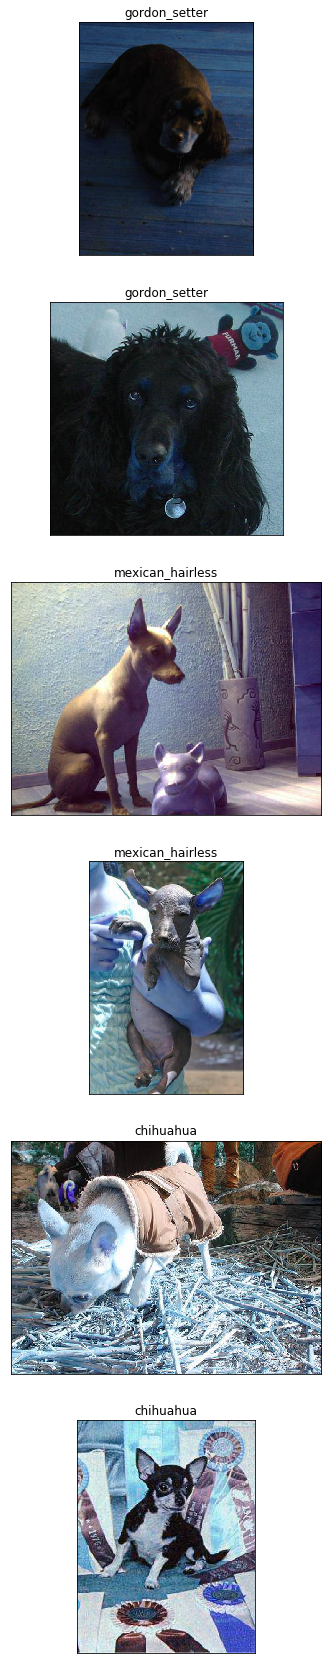

In [5]:
path = 'test_images/'
import os
lists = os.listdir(path)
f,ax = plt.subplots(len(lists),1, figsize=(30,30))
for i in range(len(lists)):
    img = cv2.imread(path+lists[i])
    ax[i].imshow(img)
    ax[i].set_title(prediction(path+lists[i]))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show() 